## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

## Importing Dataset

In [2]:
df = pd.read_excel(r"C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Forecasting\Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Data Analysis

In [3]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


## Data Visualizations

<Axes: xlabel='Month'>

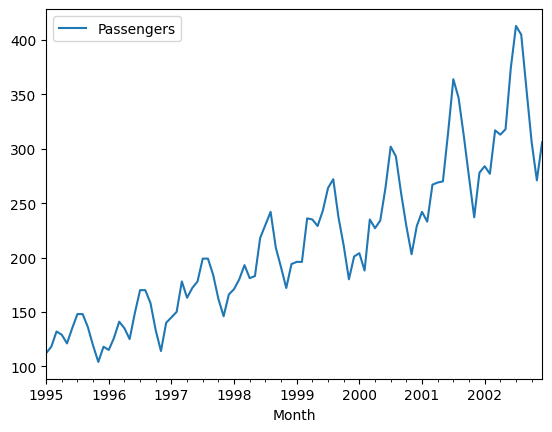

In [6]:
airlines1 = pd.read_excel(r"C:\Users\umair\OneDrive\Desktop\My Files\ExcelR\Assignments\Forecasting\Airlines+Data.xlsx", header=0, index_col=0,parse_dates=True)
airlines1.plot()

In [7]:
airlines1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

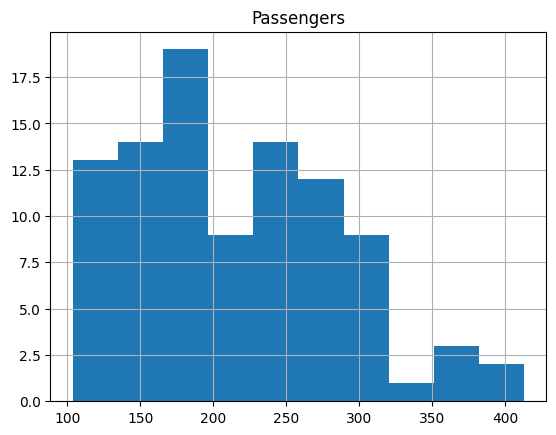

In [8]:
airlines1.hist()

<Axes: ylabel='Density'>

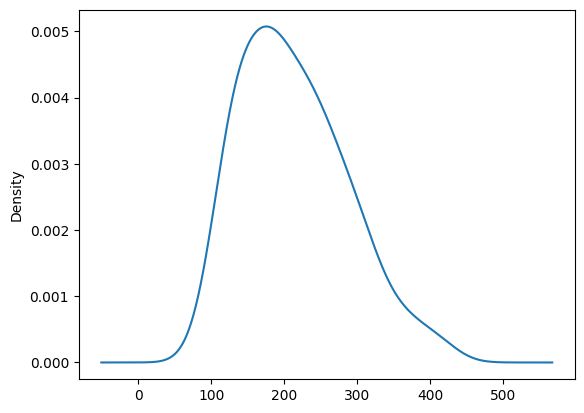

In [9]:
airlines1.Passengers.plot(kind='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

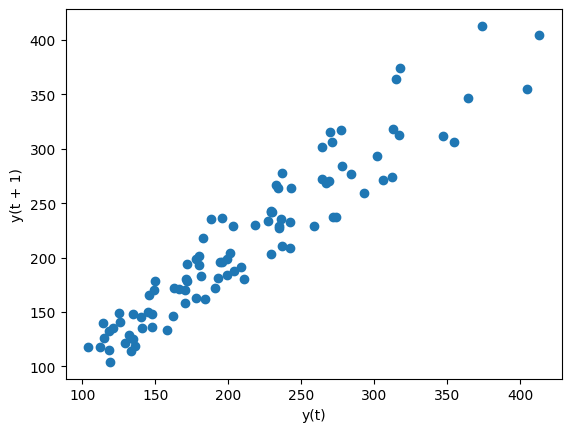

In [10]:
lag_plot(airlines1)

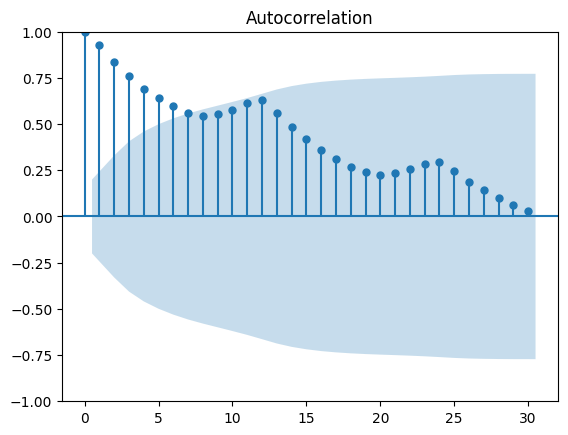

In [11]:
plot_acf(airlines1,lags=30);

## Upsampling

In [12]:
upsampled = airlines1.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


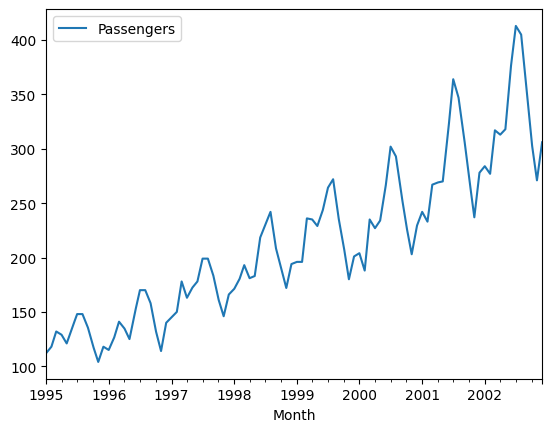

In [13]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()

(array([420., 391., 574., 309., 436., 328., 210.,  86.,  69.,  69.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

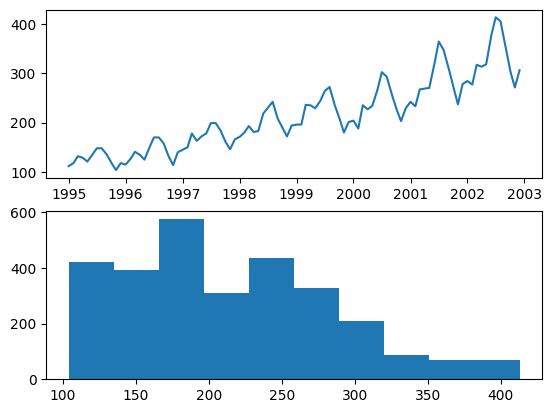

In [14]:
plt.subplot(2,1,1)
plt.plot(interpolated)

plt.subplot(2,1,2)
plt.hist(interpolated)

In [15]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


## Transformations

In [16]:
dataframe = pd.DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.sqrt(dataframe['Passengers'])

(array([245., 424., 325., 499., 319., 362., 350., 183., 104.,  81.]),
 array([10.19803903, 11.21047527, 12.22291151, 13.23534775, 14.24778399,
        15.26022023, 16.27265647, 17.28509271, 18.29752895, 19.30996519,
        20.32240143]),
 <BarContainer object of 10 artists>)

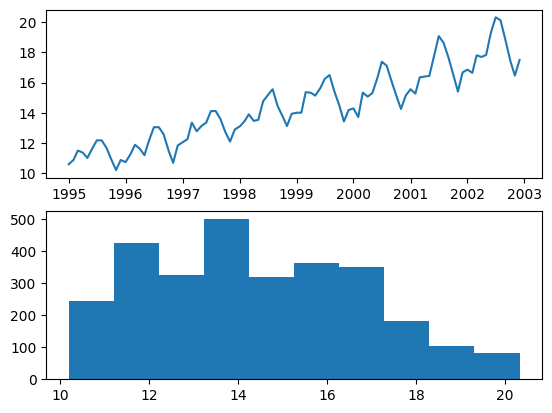

In [17]:
plt.subplot(2,1,1)
plt.plot(dataframe['Passengers'])

plt.subplot(2,1,2)
plt.hist(dataframe['Passengers'])

In [18]:
interpolated

,Passengers
Month,
1995-01-01,10.583005
1995-01-02,10.592146
1995-01-03,10.601278
1995-01-04,10.610403
1995-01-05,10.619519
...,...
2002-11-27,17.358955
2002-11-28,17.392527
2002-11-29,17.426034


In [19]:
dataframe = pd.DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.log(dataframe['Passengers'])

(array([154., 297., 276., 335., 475., 411., 355., 291., 191., 107.]),
 array([2.32219545, 2.39114828, 2.46010112, 2.52905395, 2.59800679,
        2.66695962, 2.73591246, 2.80486529, 2.87381813, 2.94277096,
        3.0117238 ]),
 <BarContainer object of 10 artists>)

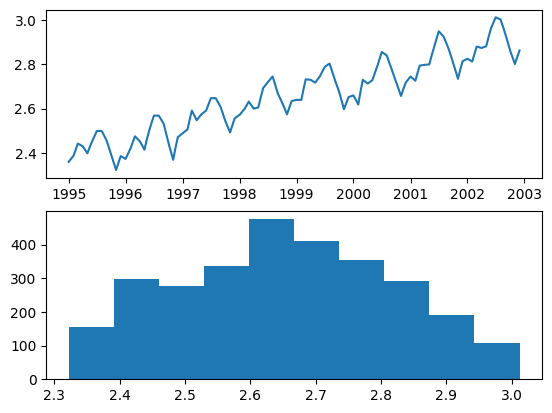

In [20]:
plt.subplot(2,1,1)
plt.plot(dataframe['Passengers'])

plt.subplot(2,1,2)
plt.hist(dataframe['Passengers'])

In [21]:
interpolated

,Passengers
Month,
1995-01-01,2.359249
1995-01-02,2.360113
1995-01-03,2.360975
1995-01-04,2.361835
1995-01-05,2.362694
...,...
2002-11-27,2.854109
2002-11-28,2.856041
2002-11-29,2.857965


In [22]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2892 entries, 1995-01-01 to 2002-12-01
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


In [23]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Plotting

In [24]:
df["Date"]=pd.to_datetime(df.Month,format="%b-%y")
df["Months"]=df.Date.dt.strftime("%b")
df["Year"]=df.Date.dt.strftime("%Y")

<Axes: xlabel='Months', ylabel='Passengers'>

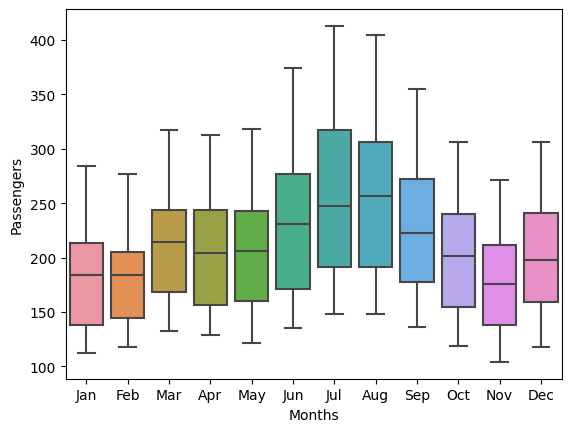

In [25]:
sns.boxplot(x="Months",y="Passengers",data=df)

<Axes: xlabel='Year', ylabel='Passengers'>

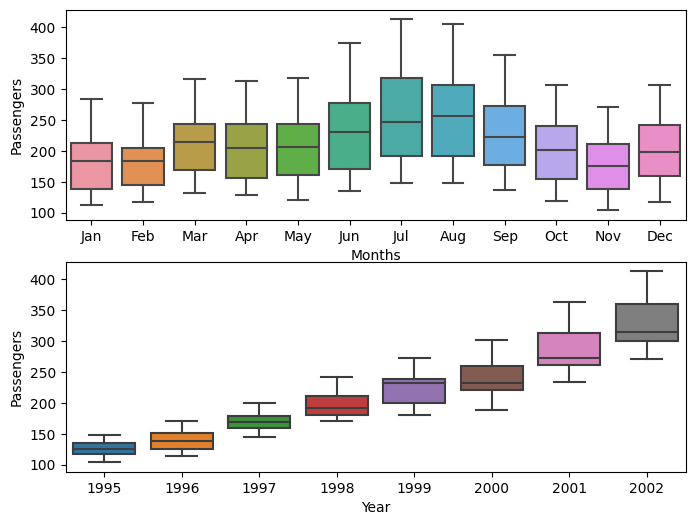

In [26]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
sns.boxplot(x="Months",y="Passengers",data=df)
plt.subplot(2,1,2)
sns.boxplot(x="Year",y="Passengers",data=df)

In [27]:
Month_Dummies = pd.DataFrame(pd.get_dummies(df['Months']))
airline1 = pd.concat([df,Month_Dummies],axis = 1)

In [28]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])

In [29]:
airline1

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,Log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


<Axes: xlabel='Year', ylabel='Passengers'>

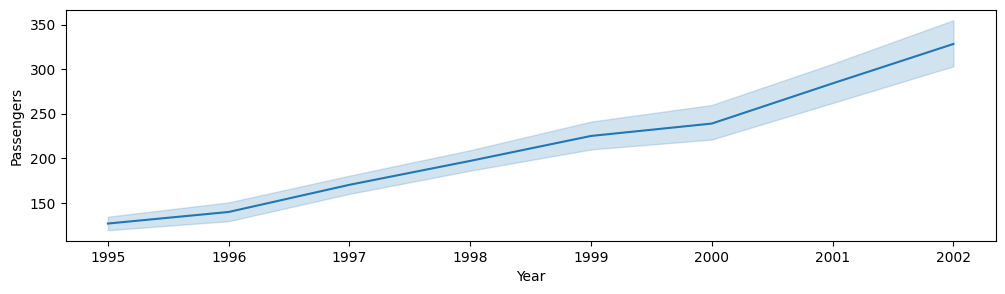

In [30]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=df)

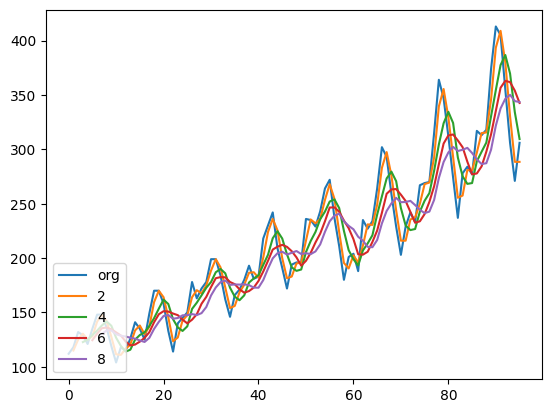

In [31]:
df.Passengers.plot(label="org")
for i in range(2,10,2):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<Axes: >

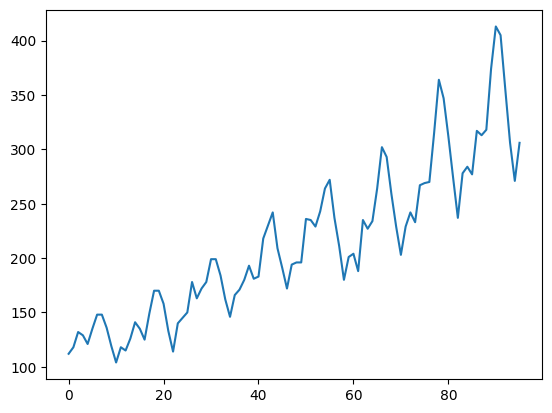

In [32]:
df.Passengers.plot()

## Building Model & Finding RMSE Value

In [33]:
train = airline1.head(80)
test = airline1.tail(16)

In [34]:
linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726805

In [35]:
Exp = smf.ols('Log_Passengers~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

In [36]:
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584205

In [37]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443319

In [38]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570102456

In [39]:
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.3264841462115

In [40]:
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.469000230304205

## Model Accuracy

In [41]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,129.266476
4,rmse_add_sea_quad,23.910984
5,rmse_Mult_sea,135.326484
6,rmse_Mult_add_sea,9.469000


## Prediction

In [42]:
t = np.arange(90,101)
t

array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [43]:
t_squared=np.array(t*t)
t_squared

array([ 8100,  8281,  8464,  8649,  8836,  9025,  9216,  9409,  9604,
        9801, 10000])

In [44]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [45]:
dl={'t':t,'t_squared':t_squared}
dl=pd.DataFrame(dl)

In [46]:
newdata = pd.concat([Month,dl],axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,90,8100
1,2003-02-01,91,8281
2,2003-03-01,92,8464
3,2003-04-01,93,8649
4,2003-05-01,94,8836
5,2003-06-01,95,9025
6,2003-07-01,96,9216
7,2003-08-01,97,9409
8,2003-09-01,98,9604
9,2003-10-01,99,9801


In [47]:
model_full = smf.ols('Passengers~t',data=airline1).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0     310.598899
1     312.933611
2     315.268324
3     317.603036
4     319.937749
5     322.272461
6     324.607174
7     326.941886
8     329.276598
9     331.611311
10    333.946023
dtype: float64

In [48]:
newdata["forecasted_passengers"]=pd.Series(pred_new)

In [49]:
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,90,8100,310.598899
1,2003-02-01,91,8281,312.933611
2,2003-03-01,92,8464,315.268324
3,2003-04-01,93,8649,317.603036
4,2003-05-01,94,8836,319.937749
5,2003-06-01,95,9025,322.272461
6,2003-07-01,96,9216,324.607174
7,2003-08-01,97,9409,326.941886
8,2003-09-01,98,9604,329.276598
9,2003-10-01,99,9801,331.611311
